In [1]:
# Install necessary packages
!pip install pandas matplotlib seaborn scikit-learn joblib shap


In [9]:
# Import Libraries
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For advanced SHAP analysis
import shap


In [26]:
# Define paths
BASE_DIR = os.getcwd()  # Current working directory
DATA_DIR = os.path.join(BASE_DIR, 'data')  # Directory where your data is stored

# Path to the cleaned dataset
data_path = 'Cleaned_healthcare_dataset.csv'

# Load the dataset
try:
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file {data_path} was not found.")


Dataset loaded successfully!


In [28]:
# Display the first few rows
data.head()


,Name,Age,Gender,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,...,Blood Type_4,Blood Type_5,Blood Type_6,Blood Type_7,Admission Type_0,Admission Type_1,Admission Type_2,Test Results_0,Test Results_1,Test Results_2
0,Patient_0,58,1,3,2023-01-01,3,3,1,10.668620,229,...,0,0,0,1,1,0,0,1,0,0
1,Patient_1,71,0,1,2023-01-02,7,0,4,9.981405,431,...,0,0,0,1,0,1,0,0,1,0
2,Patient_2,48,0,2,2023-01-03,7,0,0,10.139826,277,...,0,0,0,0,1,0,0,0,0,1
3,Patient_3,34,1,0,2023-01-04,7,3,0,10.146779,372,...,0,0,0,0,1,0,0,0,0,1
4,Patient_4,62,0,3,2023-01-05,4,3,0,10.469040,390,...,0,1,0,0,1,0,0,1,0,0


In [29]:
# Path to the models directory
MODELS_DIR = os.path.join(BASE_DIR, 'models')

# Path to the trained Random Forest model
model_filename = 'random_forest_model.pkl'
model_path = 'random_forest_model.pkl'

# Load the trained model
try:
    model = joblib.load(model_path)
    print("Random Forest model loaded successfully!")
except FileNotFoundError:
    print(f"Error: The model file {model_path} was not found.")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")


Random Forest model loaded successfully!


In [30]:
# Define feature names
# Update this list based on your dataset's actual features
feature_names = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication']  # Example features

# Verify that the number of features matches the model's expectations
if len(feature_names) != len(model.feature_importances_):
    print("Warning: The number of feature names does not match the number of feature importances in the model.")
else:
    print("Feature names and importances match.")


Feature names and importances match.


In [31]:
# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model.feature_importances_
})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the feature importance
feature_importance


,Feature,Importance
0,Medical Condition,0.665900
1,Age,0.331301
2,Blood Type,0.001490
3,Medication,0.000929
4,Gender,0.000380


C:\Users\bharg\AppData\Local\Temp\ipykernel_24416\3888465925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


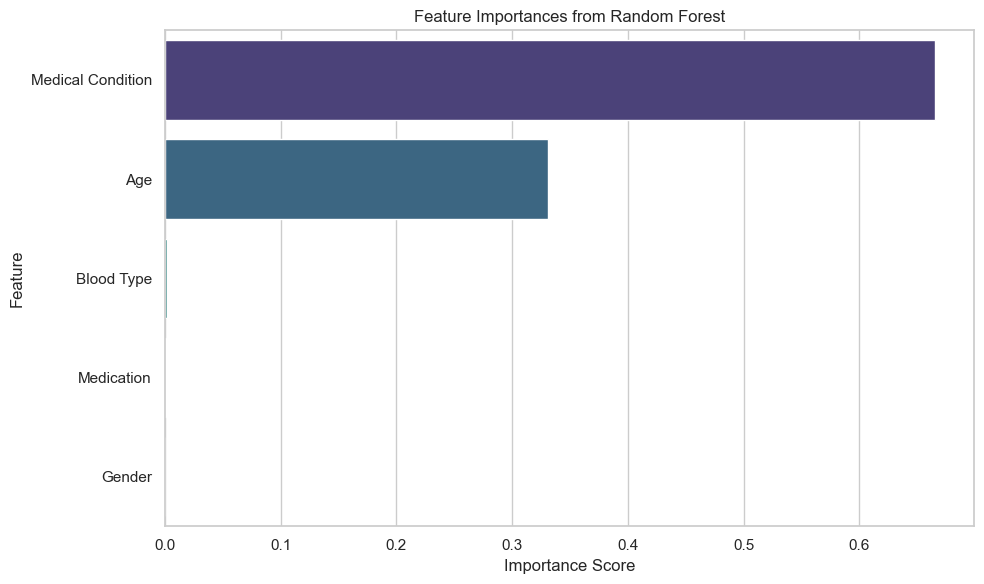

In [32]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
